In [1]:
import numpy as np
import pandas as pd
def detect_peaks(x, num_train=10, num_guard=2, rate_fa=0.3):
  """
  Detect peaks with CFAR algorithm.

  num_train: Number of training cells.
  num_guard: Number of guard cells.
  rate_fa: False alarm rate.
  """
  num_cells = x.size
  num_train_half = round(num_train / 2)
  num_guard_half = round(num_guard / 2)
  num_side = num_train_half + num_guard_half

  alpha = num_train * (rate_fa ** (-1 / num_train) - 1)  # threshold factor

  peak_idx = []
  for i in range(num_side, num_cells - num_side):

      if i != i - num_side + np.argmax(x[i - num_side:i + num_side + 1]):
          continue

      sum1 = np.sum(x[i - num_side:i + num_side + 1])
      sum2 = np.sum(x[i - num_guard_half:i + num_guard_half + 1])
      p_noise = (sum1 - sum2) / num_train
      threshold = alpha * p_noise

      if x[i] > threshold:
          peak_idx.append(i)

  peak_idx = np.array(peak_idx, dtype=int)

  return len(peak_idx)




In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

This function is used to add the norm of all axes into the data.

In [5]:
def add_norm(file):
  extra_array=pd.DataFrame()
  f = file
  try:
      data = pd.read_csv(f, skiprows = 5)
      x=data['ACC X']**0.5
  except:
    try:
        data.columns = ['Time [sec]'	,'ACC X'	,'ACC Y'	,'ACC Z']
    except:
      data = pd.read_csv(f, skiprows = 4)
  try:
      num_steps=pd.read_csv(f).loc[2][1]
  except:
      num_steps=pd.read_csv(f, skiprows = 1,on_bad_lines='skip').loc[1][1]
      # print(pd.read_csv(f, skiprows = 1,on_bad_lines='skip').loc[1][1])
  #####

  data.columns = ['Time [sec]'	,'ACC X'	,'ACC Y'	,'ACC Z']
  ##
  data = data.apply(pd.to_numeric, errors='coerce')
  # drop rows that contain NaN values
  data = data.dropna()
  ##
  data['peak']=(data['ACC X']**2+data['ACC Y']**2+data['ACC Z']**2)**0.5
  return data, num_steps


In [98]:


normalized, num_step=add_norm('/content/drive/MyDrive/data/10_run_5_1.csv')

#peak_idx = detect_peaks(normalized['peak'], num_train=10, num_guard=2, rate_fa=1)
print('acutal step',num_step)

acutal step 41


In [99]:
normalized['ANorm'] = np.sqrt(normalized['ACC X']**2 + normalized['ACC Y']**2 + normalized['ACC Z']**2)
min_value = normalized['ANorm'].min()
max_value = normalized['ANorm'].max()
normalized['ANorm'] = (normalized['ANorm'] - min_value) / (max_value - min_value)

54


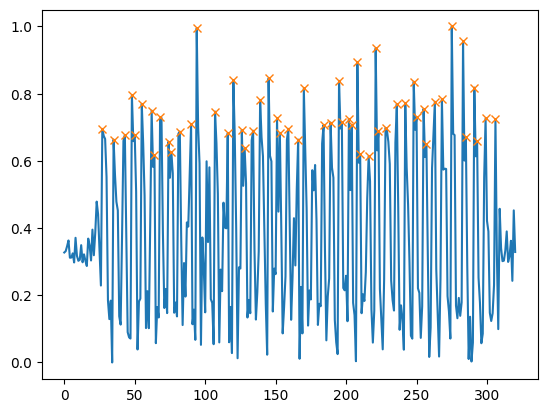

In [100]:
peaks, _ = find_peaks(normalized['ANorm'].values, distance=3.5, height=0.7)
# difference between peaks is >= 150
# prints [186 180 177 171 177 169 167 164 158 162 172]
print(len(peaks))
plt.plot(normalized['ANorm'].values)
plt.plot(peaks, normalized['ANorm'].values[peaks], "x")
plt.show()

In [71]:
import scipy
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import find_peaks
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
directory = '/content/drive/MyDrive/data/'
extra_array=pd.DataFrame()

truth_list=[]
file_list=[]

list_memory = []
extra_array=pd.DataFrame()
min_mean = 300000
best_distance = 0.0
best_height = 0.0
heights = [x / 10 for x in range(0, 10)]

dists = [x / 2 for x in range(2, 24)]
for distance in dists:
  for height in heights:
    for filename in os.listdir(directory):
        file_list.append(filename)
        f = os.path.join(directory, filename)
        if 'run' in f:
          continue
        normalized, num_step=add_norm(f)
        normalized['ANorm'] = np.sqrt(normalized['ACC X']**2 + normalized['ACC Y']**2 + normalized['ACC Z']**2)
        min_value = normalized['ANorm'].min()
        max_value = normalized['ANorm'].max()
        normalized['ANorm'] = (normalized['ANorm'] - min_value) / (max_value - min_value)
        peaks, _ = find_peaks(normalized['ANorm'].values, distance=distance, height=height)


        """print('Actual step:', num_step)
        print('Our prediction:',len(peaks))
        print('Axel prediction:',peak_idx)"""
        x = int(num_step)-len(peaks)
        list_memory.append(x)
    print("distance = " +str(distance) + ', height = ' + str(height) + 'mean : ' + str(np.mean(list_memory)))
    if min_mean > np.mean(list_memory):
      min_mean = np.mean(list_memory)
      best_distance = distance
      best_height = height



distance = 1.0, height = 0.0mean : -74.51181102362204
distance = 1.0, height = 0.1mean : -72.09055118110236
distance = 1.0, height = 0.2mean : -69.98162729658793
distance = 1.0, height = 0.3mean : -66.22834645669292
distance = 1.0, height = 0.4mean : -58.92755905511811
distance = 1.0, height = 0.5mean : -49.09055118110236
distance = 1.0, height = 0.6mean : -37.68841394825647
distance = 1.0, height = 0.7mean : -25.648622047244096
distance = 1.0, height = 0.8mean : -13.89501312335958
distance = 1.0, height = 0.9mean : -3.3236220472440943
distance = 1.5, height = 0.0mean : -9.795275590551181
distance = 1.5, height = 0.1mean : -14.784776902887138
distance = 1.5, height = 0.2mean : -18.706238643246518
distance = 1.5, height = 0.3mean : -21.296400449943757
distance = 1.5, height = 0.4mean : -21.858267716535433
distance = 1.5, height = 0.5mean : -20.486220472440944
distance = 1.5, height = 0.6mean : -17.47383047707272
distance = 1.5, height = 0.7mean : -13.245844269466316
distance = 1.5, heig

<ipython-input-5-92b1bcbeb9af>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['peak']=(data['ACC X']**2+data['ACC Y']**2+data['ACC Z']**2)**0.5


distance = 2.5, height = 0.6mean : -5.02787827197276
distance = 2.5, height = 0.7mean : -3.3315375051802736
distance = 2.5, height = 0.8mean : -1.1897839693115284
distance = 2.5, height = 0.9mean : 1.1354330708661418
distance = 3.0, height = 0.0mean : 0.20568465527174956
distance = 3.0, height = 0.1mean : -0.5901762279715036
distance = 3.0, height = 0.2mean : -1.2832814502838308
distance = 3.0, height = 0.3mean : -1.7874015748031495
distance = 3.0, height = 0.4mean : -1.9198600174978129
distance = 3.0, height = 0.5mean : -1.642074631975351
distance = 3.0, height = 0.6mean : -0.8703300385324175
distance = 3.0, height = 0.7mean : 0.38599081364829396
distance = 3.0, height = 0.8mean : 2.0147838663024267
distance = 3.0, height = 0.9mean : 3.8108661417322836
distance = 3.5, height = 0.0mean : 3.4515979620194535
distance = 3.5, height = 0.1mean : 3.1624772864930346
distance = 3.5, height = 0.2mean : 2.9227455058683702
distance = 3.5, height = 0.3mean : 2.7723826188393117
distance = 3.5, heig

<ipython-input-5-92b1bcbeb9af>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['peak']=(data['ACC X']**2+data['ACC Y']**2+data['ACC Z']**2)**0.5
<ipython-input-72-3ec8bf521b31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normalized['ANorm'] = np.sqrt(normalized['ACC X']**2 + normalized['ACC Y']**2 + normalized['ACC Z']**2)
<ipython-input-72-3ec8bf521b31>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

distance = 9.0, height = 0.0mean : 29.06661123881254
distance = 9.0, height = 0.1mean : 29.142655779138718
distance = 9.0, height = 0.2mean : 29.218685087676924
distance = 9.0, height = 0.3mean : 29.29945265988093
distance = 9.0, height = 0.4mean : 29.393557623478884
distance = 9.0, height = 0.5mean : 29.510957214685515
distance = 9.0, height = 0.6mean : 29.672827573200056
distance = 9.0, height = 0.7mean : 29.904246344206975
distance = 9.0, height = 0.8mean : 30.21464846479989
distance = 9.0, height = 0.9mean : 30.578091709124596
distance = 9.5, height = 0.0mean : 30.658700557167197
distance = 9.5, height = 0.1mean : 30.74674967954587
distance = 9.5, height = 0.2mean : 30.83473669837513
distance = 9.5, height = 0.3mean : 30.926147162639154
distance = 9.5, height = 0.4mean : 31.0281664791901
distance = 9.5, height = 0.5mean : 31.14839835361489
distance = 9.5, height = 0.6mean : 31.303483251034297
distance = 9.5, height = 0.7mean : 31.517429001150138
distance = 9.5, height = 0.8mean : 3

ValueError: ignored

In [ ]:
print( best_distance)
print(best_height)

6.0
0.6


For walk best distance 6 et height 0.6

In [85]:
directory = '/content/drive/MyDrive/data/'
extra_array=pd.DataFrame()

truth_list=[]
file_list=[]

list_memory = []
extra_array=pd.DataFrame()
min_mean = 300000
best_distance_w = 0.0
best_height_w = 0.0
heights = [x / 10 for x in range(0, 10)]

dists = [x / 2 for x in range(2, 24)]
for distance in dists:
  for height in heights:
    for filename in os.listdir(directory):
        file_list.append(filename)
        f = os.path.join(directory, filename)
        if 'walk' in f:
          continue
        normalized, num_step=add_norm(f)
        normalized['ANorm'] = np.sqrt(normalized['ACC X']**2 + normalized['ACC Y']**2 + normalized['ACC Z']**2)
        min_value = normalized['ANorm'].min()
        max_value = normalized['ANorm'].max()
        normalized['ANorm'] = (normalized['ANorm'] - min_value) / (max_value - min_value)
        peaks, _ = find_peaks(normalized['ANorm'].values, distance=distance, height=height)


        """print('Actual step:', num_step)
        print('Our prediction:',len(peaks))
        print('Axel prediction:',peak_idx)"""
        x = int(num_step)-len(peaks)
        list_memory.append(x)
    print("distance = " +str(distance) + ', height = ' + str(height) + 'mean : ' + str(np.mean(list_memory)))

    if min_mean > np.mean(list_memory):
      min_mean = np.mean(list_memory)
      best_distance_w = distance
      best_height_w = height

print(best_distance_w)
print(best_height_w)
print(min_mean)


distance = 1.0, height = 0.0mean : -29.77952755905512
distance = 1.0, height = 0.1mean : -28.055118110236222
distance = 1.0, height = 0.2mean : -25.666666666666668
distance = 1.0, height = 0.3mean : -22.429133858267715
distance = 1.0, height = 0.4mean : -18.82992125984252
distance = 1.0, height = 0.5mean : -14.877952755905511
distance = 1.0, height = 0.6mean : -9.416197975253093
distance = 1.0, height = 0.7mean : -0.8159448818897638
distance = 1.0, height = 0.8mean : 9.496062992125983
distance = 1.0, height = 0.9mean : 20.007874015748033
distance = 1.5, height = 0.0mean : 15.481746599856836
distance = 1.5, height = 0.1mean : 11.99737532808399
distance = 1.5, height = 0.2mean : 9.467595396729255
distance = 1.5, height = 0.3mean : 7.883014623172103
distance = 1.5, height = 0.4mean : 7.061942257217848
distance = 1.5, height = 0.5mean : 6.925688976377953
distance = 1.5, height = 0.6mean : 7.8920796665122745
distance = 1.5, height = 0.7mean : 10.752843394575677
distance = 1.5, height = 0.8m

KeyboardInterrupt: ignored